In [5]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def maximum_minimum_distance_clustering(nodes, cluster_radius):
    cluster_heads = []
    remaining_nodes = nodes.copy()

    cluster_heads.append(remaining_nodes.pop(0))

    while remaining_nodes:
        max_min_distance = 0
        max_min_distance_node = None
        for node in remaining_nodes:
            min_distance = min(euclidean_distance(node, ch) for ch in cluster_heads)
            if min_distance > max_min_distance and min_distance > cluster_radius:
                max_min_distance = min_distance
                max_min_distance_node = node
        if max_min_distance_node is None:
            break
        cluster_heads.append(max_min_distance_node)
        remaining_nodes.remove(max_min_distance_node)

    clusters = {ch: [] for ch in cluster_heads}
    for node in remaining_nodes:
        nearest_ch = min(cluster_heads, key=lambda ch: euclidean_distance(node, ch))
        clusters[nearest_ch].append(node)

    return clusters

import random
nodes=[(random.randrange(1,100),random.randrange(1,100)) for i in range(100)]
cluster_radius = 20
clusters = maximum_minimum_distance_clustering(nodes, cluster_radius)

for cluster_head, members in clusters.items():
    print(f"Cluster Head: {cluster_head}")
    print(f"Members: {members}")
    print()

Cluster Head: (10, 42)
Members: [(11, 52), (19, 48), (13, 39), (6, 26), (18, 55), (7, 34)]

Cluster Head: (97, 99)
Members: [(89, 98), (89, 90), (94, 91), (88, 87), (87, 97)]

Cluster Head: (92, 11)
Members: [(98, 27), (80, 8), (92, 17), (95, 19)]

Cluster Head: (2, 98)
Members: []

Cluster Head: (61, 52)
Members: [(57, 46), (67, 46), (54, 41), (70, 54)]

Cluster Head: (43, 4)
Members: [(36, 10), (49, 4), (50, 21), (51, 7), (48, 23), (43, 12)]

Cluster Head: (43, 90)
Members: [(44, 72), (32, 85), (52, 78), (54, 92), (42, 84), (43, 81)]

Cluster Head: (97, 49)
Members: [(83, 54), (90, 58), (84, 55), (96, 31), (98, 46)]

Cluster Head: (4, 8)
Members: [(5, 25), (11, 4), (4, 10), (6, 8), (14, 3)]

Cluster Head: (74, 80)
Members: [(83, 77), (61, 72), (63, 83), (87, 84), (62, 92), (70, 80), (62, 81), (78, 84), (75, 94), (81, 62), (73, 66)]

Cluster Head: (21, 75)
Members: [(24, 80), (26, 63), (33, 79), (15, 60)]

Cluster Head: (34, 51)
Members: [(47, 57), (39, 65), (41, 56), (33, 42), (46, 6

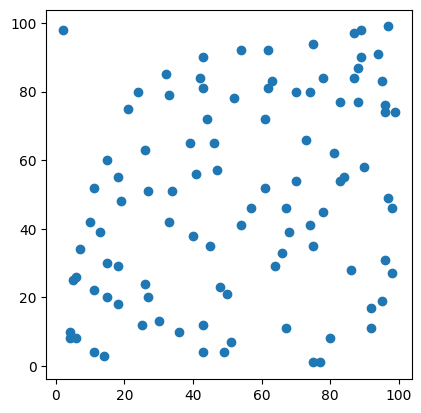

In [6]:
import matplotlib.pyplot as plt

plt.scatter([node[0] for node in nodes],[node[1] for node in nodes])
plt.gca().set_aspect('equal')

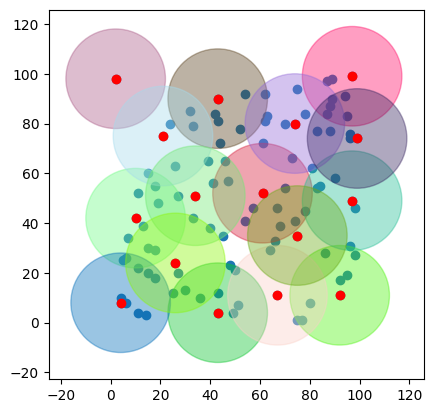

16


In [7]:
import matplotlib.pyplot as plt

plt.scatter([node[0] for node in nodes],[node[1] for node in nodes])
x,y=[node[0] for node in clusters.keys()],[node[1] for node in clusters.keys()]
for ch in clusters.keys():
    color=(random.choice(range(256))/255,
           random.choice(range(256))/255,
           random.choice(range(256))/255)
    cir = plt.Circle((ch[0],ch[1]), cluster_radius,alpha=0.4, color=color)
    plt.gca().add_patch(cir)
    plt.gca().set_aspect('equal')
plt.scatter(x,y,color='r')
plt.show()
print(len(x))


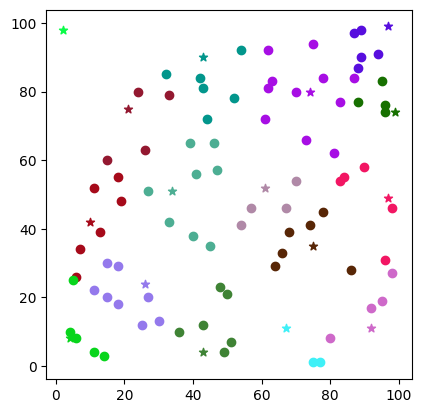

16


In [8]:
import matplotlib.pyplot as plt

x,y=[node[0] for node in clusters.keys()],[node[1] for node in clusters.keys()]
for i in clusters.keys():
    color=(random.choice(range(256))/255,
           random.choice(range(256))/255,
           random.choice(range(256))/255)
    plt.scatter(i[0],i[1],color=color,marker='*')
    for j in clusters[i]:
        plt.scatter(j[0],j[1],color=color)
plt.gca().set_aspect('equal')
plt.show()
print(len(x))